<a href="https://colab.research.google.com/github/milieureka/redback-orion/blob/main/Small_detection_YOLO_and_SAHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install lib
!pip install -q torch sahi yolov8 ultralytics opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 857.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 374.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.6/825.6 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.6 MB/s eta 0:0

In [2]:
#Import needed lib
#YOLOv8-S model
from sahi.utils.yolov8 import(
    download_yolov8s_model
)

#Import required functions and classes
from sahi import AutoDetectionModel #create model
from sahi.utils.cv import read_image #Ultil to read, download image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict #Prediction
from sahi.prediction import visualize_object_predictions
from IPython.display import Image, display #Display image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
#Download weight YOLOv8
yolov8_model_path = 'models/yolov8s.pt'
download_yolov8s_model(yolov8_model_path)

In [29]:
#Download test image
download_from_url('https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcSR22GkZQzkgYfsdJIOPTqKmQfagB1fynV9_G4FEKvGmwENquqL', 'demo_data/crowd_1.png')
download_from_url('https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSvUtxnpR2UyckaHgnY7CpDcOHF4Ow33_fG9EWypDbqjXNl6vl_', 'demo_data/crowd_2.png')

In [30]:
#Load model
detection_model = AutoDetectionModel.from_pretrained(
    model_type = "yolov8",
    model_path = yolov8_model_path,
    confidence_threshold = 0.2,
    device = "cuda:0"
)

**1st example**

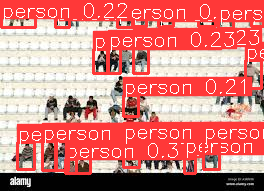

In [32]:
# Dectect without SAHI
result = get_prediction('/content/demo_data/crowd_1.png', detection_model)
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")

Performing prediction on 2 slices.


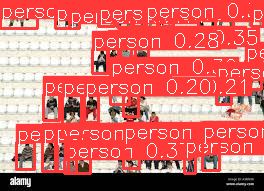

In [33]:
# Try with SAHI
result = get_sliced_prediction(
    '/content/demo_data/crowd_1.png',
    detection_model = detection_model,
    slice_height = 255,
    slice_width = 255,
    overlap_height_ratio = 0.2, #ratio, overlap 20 pixels
    overlap_width_ratio = 0.2,
)
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")

**2nd Example**

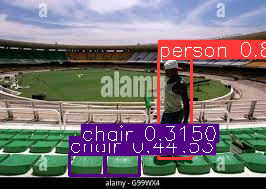

In [34]:
# Dectect without SAHI
result = get_prediction("/content/demo_data/crowd_2.png", detection_model)
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")

Performing prediction on 35 slices.


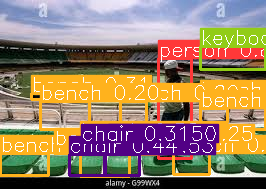

In [40]:
# Try with SAHI
result = get_sliced_prediction(
    "/content/demo_data/crowd_2.png",
    detection_model = detection_model,
    slice_height = 50,
    slice_width = 50,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,

)
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")